# 作業二：MLB 資料視覺化

## 作業要求：
* 使用提供的 .ipynb 模板
* 計算所有大聯盟球員的平均得分（Runs）將球員分為「高得分」與「低得分」兩組
* 將兩組球員的 *得分指標（如下）* 全部相加 畫出這兩組的 correlation matrix
* 解釋你對結果的看法

## 得分指標
* 得分（Runs Scored, R）
* 打點（Runs Batted In, RBI）
* 安打數（Hits, H）
* 全壘打數（Home Runs, HR）
* 打擊率（Batting Average, AVG）
* 上壘率（On-Base Percentage, OBP）
* 長打率（Slugging Percentage, SLG）
* 盜壘數（Stolen Bases, SB）
* 打數（At Bats, AB）
* 四壞球率（Walks, BB）
* 被三振數（Strikeouts, K）


## 引入套件
這份作業會使用：
* [pandas](https://pandas.pydata.org/)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [1]:
## TODO 1: 引入需使用的套件
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 讀取檔案
使用 pandas 讀入 csv 檔，成為 dataframe

In [3]:
## TODO 2: 讀取檔案

# 讀取你的檔案
mlb_df = pd.read_csv('mlb/output.csv')
# 檢查
mlb_df.head

<bound method NDFrame.head of                 player   AB    R    H  HR  RBI   BB    K  SB    AVG    OBP  \
0          Aaron Judge  559  122  180  58  144  133  171  10  0.322  0.458   
1        Shohei Ohtani  636  134  197  54  130   81  162  59  0.310  0.390   
2            Juan Soto  576  128  166  41  109  129  119   7  0.288  0.419   
3           Bobby Witt  636  125  211  32  109   57  106  31  0.332  0.389   
4       Yordan Alvarez  552   88  170  35   86   69   95   6  0.308  0.392   
..                 ...  ...  ...  ...  ..  ...  ...  ...  ..    ...    ...   
124     Andrés Giménez  583   64  147   9   63   26   97  30  0.252  0.298   
125  Christopher Morel  535   56  105  21   60   61  159   8  0.196  0.288   
126         Zack Gelof  497   60  105  17   49   38  188  25  0.211  0.270   
127      Orlando Arcia  551   50  120  17   46   41  128   2  0.218  0.271   
128      Maikel Garcia  575   84  133   7   58   42  103  37  0.231  0.281   

       SLG  
0    0.701  
1    0.

## 處理資料
在這步驟，我們要先計算所有球員的平均得分，從而將球員分成高得分組與低得分組

In [10]:
# TODO 3: 處理資料

# 計算所有球員 Runs 的平均值
R_mean = mlb_df['R'].mean()

# 將球員分成得分高於平和低於平均兩組
above_avg_df = mlb_df[mlb_df['R'] > R_mean]
below_avg_df = mlb_df[mlb_df['R'] <= R_mean]

## 資料視覺化
我們要分別對上面兩 dataframe 算出 [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)，並使用 [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 為其視覺化

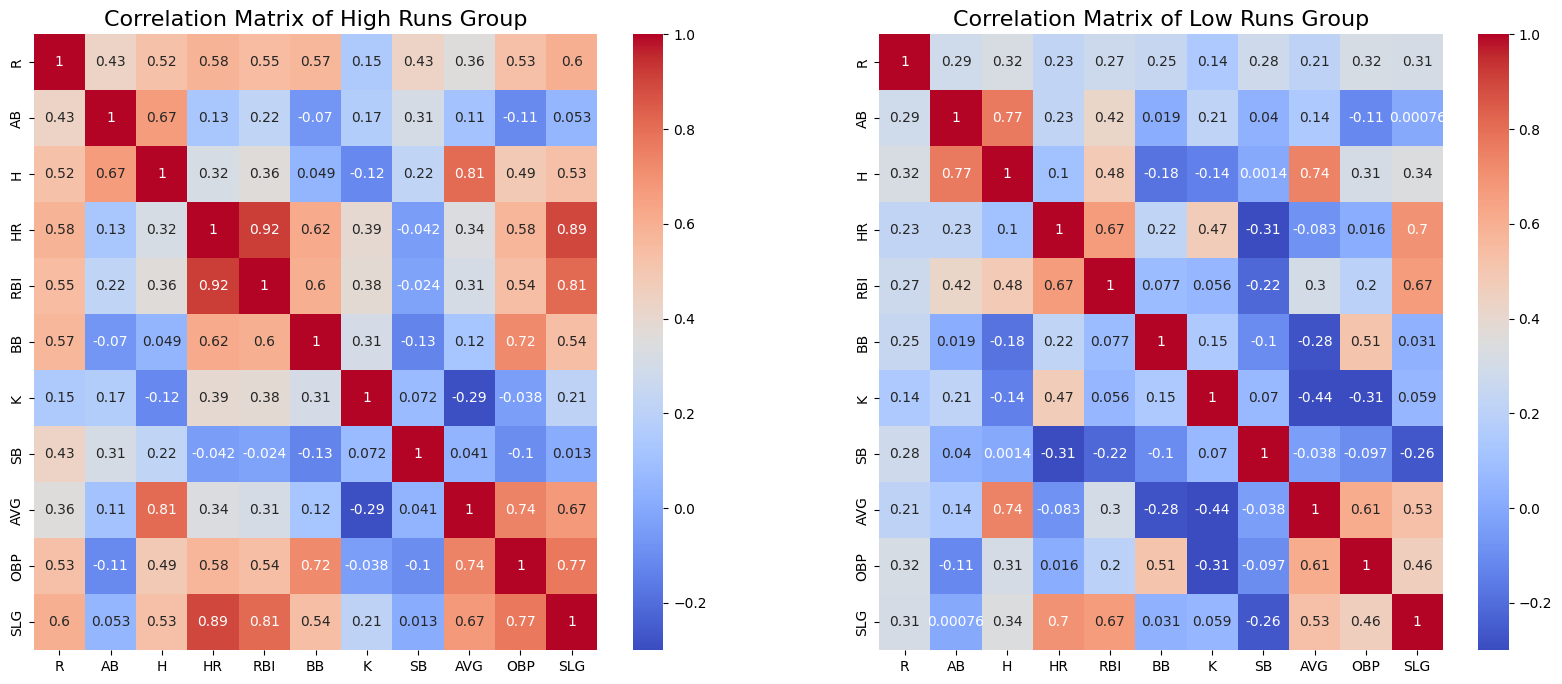

In [20]:
# TODO 4: 資料視覺化

# 要計算的欄位
numeric_cols = ['R', 'AB', 'H', 'HR', 'RBI', 'BB', 'K', 'SB', 'AVG', 'OBP', 'SLG']

# 計算 correlation matrix
above_avg_cor_matrix = above_avg_df[numeric_cols].corr()
below_avg_cor_matrix = below_avg_df[numeric_cols].corr()

# 請將兩張圖娉排顯示。左邊是高得分組的 heatmap，右邊是低得分組
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)  # 設定子圖位置為第一張圖
sns.heatmap(above_avg_cor_matrix, annot=True, cmap='coolwarm', vmin=-0.3, vmax=1)
plt.title('Correlation Matrix of High Runs Group', fontsize=16)

plt.subplot(1, 2, 2)  # 設定子圖位置為第二張圖
sns.heatmap(below_avg_cor_matrix, annot=True, cmap='coolwarm', vmin=-0.3, vmax=1)
plt.title('Correlation Matrix of Low Runs Group', fontsize=16)

plt.show()

## 你的解讀
請回下列問題（直接將回答寫在這個 cell）

### Q1: 影響「高得分組」球員得分（Runs, R）較多的得分指標，和影響影響「低得分組」較多的指標一樣嗎？
影響高分組得分較多的指標有HR(全壘打數, 0.58)、BB(四壞球率, 0.57)、RBI(打點, 0.55)，影響低分組得分較多的指標有H(安打數, 0.32)、OBP(上壘率, 0.32)、SLG(長打率, 0.31)。由此可見影響高分組得分較多的指標和影響低分組得分較多的指標不一樣。
### Q2: 從這兩者的差距中，你觀察到了什麼、會如何解讀這樣的差距呢？（例如，你能說出影響球員是否會成為高得分球員的關鍵因素嗎？）
打出全壘打或獲得四壞球通常是高得分的關鍵。高得分球員他們不僅能自己擊出全壘打得分，還能幫更多隊友製造回本壘得分的機會（RBI）。這些打者的攻擊力強，並且能夠利用自己的打擊能力和判斷球的能力創造大量得分。
在低分組中，選手的安打數和上壘率對得分的影響較大，這表示他們或許打擊能力不錯，但缺少高效得分手段（全壘打或幫助隊友回本壘）。這些選手的得分更多依賴穩定上壘、單打或長打，但這些方式無法快速轉換成大量得分。
我認為影響球員是否能成為高得分球員的關鍵因素為是否可以擊出全壘打以及幫助隊友回本壘得分。